# Flight & Weather Data With Dask

In [1]:
from dask import delayed
import dask.dataframe as dd

import pandas as pd
import numpy as np

### Explore one flight and one weather dataset

In [2]:
df = pd.read_csv('datasets/flightdelays/flightdelays-2016-1.csv')

In [3]:
df.head()

,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_ABR,...,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
0,2016-01-01,F9,214,DEN,"Denver, CO",CO,Colorado,AUS,"Austin, TX",TX,...,1145,-14.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,2035,MKE,"Milwaukee, WI",WI,Wisconsin,ATL,"Atlanta, GA",GA,...,1830,-16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,AA,1715,PIT,"Pittsburgh, PA",PA,Pennsylvania,DCA,"Washington, DC",VA,...,2009,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,B6,1126,FLL,"Fort Lauderdale, FL",FL,Florida,RDU,"Raleigh/Durham, NC",NC,...,1957,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,OO,5546,SAT,"San Antonio, TX",TX,Texas,SFO,"San Francisco, CA",CA,...,939,11.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,FL_NUM,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 22
count,89165.000000,89165.000000,89165.000000,89165.000000,86628.000000,89165.000000,89165.000000,14255.000000,14255.000000,14255.000000,14255.000000,14255.000000,0.0
mean,2078.778691,1331.873314,10.529030,1504.529973,1.551057,0.026400,0.002052,20.624483,2.664048,12.910908,0.076043,21.671624,NaN
std,1759.972293,483.144848,35.793569,506.048734,39.418018,0.160324,0.045257,57.563433,21.838650,26.019974,2.452460,42.816538,NaN
min,1.000000,1.000000,0.000000,1.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,696.000000,920.000000,0.000000,1119.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1597.000000,1328.000000,0.000000,1530.000000,-7.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,NaN
75%,2763.000000,1730.000000,5.000000,1923.000000,5.000000,0.000000,0.000000,20.000000,0.000000,18.000000,0.000000,26.000000,NaN
max,7438.000000,2359.000000,1597.000000,2359.000000,1568.000000,1.000000,1.000000,1568.000000,669.000000,668.000000,233.000000,1026.000000,NaN


Can see there is a lot of data, as this is one of 10 csv files for the project

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89165 entries, 0 to 89164
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              89165 non-null  object 
 1   UNIQUE_CARRIER       89165 non-null  object 
 2   FL_NUM               89165 non-null  int64  
 3   ORIGIN               89165 non-null  object 
 4   ORIGIN_CITY_NAME     89165 non-null  object 
 5   ORIGIN_STATE_ABR     89165 non-null  object 
 6   ORIGIN_STATE_NM      89165 non-null  object 
 7   DEST                 89165 non-null  object 
 8   DEST_CITY_NAME       89165 non-null  object 
 9   DEST_STATE_ABR       89165 non-null  object 
 10  DEST_STATE_NM        89165 non-null  object 
 11  CRS_DEP_TIME         89165 non-null  int64  
 12  DEP_DELAY            89165 non-null  float64
 13  CRS_ARR_TIME         89165 non-null  int64  
 14  ARR_DELAY            86628 non-null  float64
 15  CANCELLED            89165 non-null 

<AxesSubplot:>

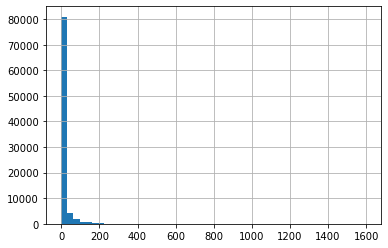

In [6]:
df.DEP_DELAY.hist(bins=50)

In [7]:
df.UNIQUE_CARRIER.nunique()

12

In [8]:
df.ORIGIN.nunique()

293

In [9]:
df_weather = pd.read_csv('datasets/weatherdata/ATL.csv')

In [10]:
df_weather.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2016-01-01,46,43,39,38,33,27,82,68,53,...,10,10,10,22,13,25.0,0.00,8,NaN,320
1,2016-01-02,47,41,35,29,26,25,70,58,45,...,10,10,10,18,10,24.0,0.00,6,NaN,315
2,2016-01-03,53,44,35,29,27,25,70,53,35,...,10,10,10,17,10,23.0,0.00,6,NaN,310
3,2016-01-04,45,39,32,27,23,15,70,55,40,...,10,10,10,22,14,30.0,0.00,1,NaN,339
4,2016-01-05,44,35,26,17,14,12,58,44,29,...,10,10,10,18,10,24.0,0.00,1,NaN,88


In [11]:
df_weather.describe()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,CloudCover,WindDirDegrees
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,364.000000,366.000000,366.000000
mean,75.765027,66.087432,55.945355,55.267760,50.491803,45.136612,82.109290,61.639344,40.680328,30.151694,30.079235,30.006311,9.994536,9.442623,7.726776,18.524590,8.185792,24.049451,4.098361,210.877049
std,15.442673,14.978450,14.997617,15.524065,16.603637,17.834334,13.483387,12.867331,14.793890,0.140587,0.141829,0.149944,0.073821,1.330666,3.537927,5.688556,3.138522,7.296761,2.339921,93.268437
min,34.000000,30.000000,20.000000,10.000000,8.000000,1.000000,0.000000,0.000000,0.000000,29.830000,29.560000,29.400000,9.000000,2.000000,0.000000,8.000000,2.000000,10.000000,0.000000,3.000000
25%,65.000000,55.000000,44.000000,44.000000,39.000000,31.000000,73.000000,53.000000,30.000000,30.050000,29.980000,29.920000,10.000000,10.000000,6.000000,14.000000,6.000000,19.000000,2.000000,116.000000
50%,79.000000,68.000000,58.000000,58.000000,54.000000,49.000000,84.000000,62.000000,39.000000,30.140000,30.080000,30.000000,10.000000,10.000000,10.000000,17.000000,8.000000,23.000000,4.000000,229.000000
75%,89.000000,80.750000,71.000000,68.750000,65.000000,60.750000,93.000000,69.000000,47.000000,30.250000,30.170000,30.100000,10.000000,10.000000,10.000000,22.000000,10.000000,28.000000,6.000000,296.000000
max,100.000000,88.000000,79.000000,77.000000,74.000000,72.000000,100.000000,95.000000,89.000000,30.570000,30.490000,30.430000,10.000000,10.000000,10.000000,46.000000,22.000000,57.000000,8.000000,358.000000


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       366 non-null    object 
 1   Max TemperatureF           366 non-null    int64  
 2   Mean TemperatureF          366 non-null    int64  
 3   Min TemperatureF           366 non-null    int64  
 4   Max Dew PointF             366 non-null    int64  
 5   MeanDew PointF             366 non-null    int64  
 6   Min DewpointF              366 non-null    int64  
 7   Max Humidity               366 non-null    int64  
 8   Mean Humidity              366 non-null    int64  
 9   Min Humidity               366 non-null    int64  
 10  Max Sea Level PressureIn   366 non-null    float64
 11  Mean Sea Level PressureIn  366 non-null    float64
 12  Min Sea Level PressureIn   366 non-null    float64
 13  Max VisibilityMiles        366 non-null    int64  

<AxesSubplot:>

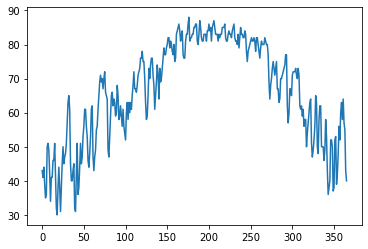

In [13]:
df_weather['Mean TemperatureF'].plot()

### Creating delayed functions for reading & cleaning of data

Replace zeros in 'WEATHER DELAY' column with nan to make counting delays easier

In [14]:
@delayed
def read_flights(filename):
    df = pd.read_csv(filename, parse_dates=['FL_DATE'])
    df['WEATHER_DELAY'] = df['WEATHER_DELAY'].replace(0, np.nan)
    return df

In [15]:
flight_filenames = ['flightdelays-2016-1.csv', 
                    'flightdelays-2016-2.csv', 
                    'flightdelays-2016-3.csv', 
                    'flightdelays-2016-4.csv', 
                    'flightdelays-2016-5.csv']

In [16]:
dataframes = []
# Read all data
for filename in flight_filenames:
    dataframes.append(read_flights('datasets/flightdelays/' + filename))

flight_delays = dd.from_delayed(dataframes)

print(flight_delays['WEATHER_DELAY'].mean().compute())

51.29467680608365


Second delayed function to read weather data

In [17]:
@delayed
def read_weather(filename):
    df = pd.read_csv(filename, parse_dates=['Date'])
    df['PrecipitationIn'] = pd.to_numeric(df['PrecipitationIn'], errors='coerce')
    # Create 'Airport' column
    df['Airport'] = filename.split('.')[0]
    return df

In [18]:
weather_filenames = ['ATL.csv', 'DEN.csv', 'DFW.csv', 'MCO.csv', 'ORD.csv']

In [19]:
weather_dfs = []

In [20]:
for filename in weather_filenames:
    weather_dfs.append(read_weather('datasets/weatherdata/' + 'ATL.csv'))

weather = dd.from_delayed(weather_dfs)

# Print result of weather.nlargest(1, 'Max TemperatureF')
print(weather.nlargest(1, 'Max TemperatureF').compute())

ATL.csv
DEN.csv
DFW.csv
MCO.csv
ORD.csv
          Date  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
176 2016-06-25               100                 88                76   

     Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
176              71              66             61            82   

     Mean Humidity  Min Humidity  ...  Mean VisibilityMiles  \
176             56            29  ...                    10   

     Min VisibilityMiles  Max Wind SpeedMPH  Mean Wind SpeedMPH  \
176                   10                 16                   8   

     Max Gust SpeedMPH  PrecipitationIn  CloudCover  Events  WindDirDegrees  \
176               28.0              0.0           3     NaN             334   

                      Airport  
176  datasets/weatherdata/ATL  

[1 rows x 24 columns]


In [25]:
is_snowy = weather['Events'].str.contains('Snow').fillna(False)

In [26]:
def percent_delayed(df):
    return (df['WEATHER_DELAY'].count() / len(df)) * 100